In [15]:
from naoqi import ALProxy
import almath
import motion
import time
import signal
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Nao configurations
ip = "10.0.255.22"  # laptop-ti0kt4lp.local. for simulations
port = 9559
fractionMaxSpeed = 0.1
run = True

In [17]:
# Proxies
motion_proxy = ALProxy("ALMotion" , ip, port)
init_proxy = ALProxy("ALRobotPosture" , ip, port)
memory_Proxy = ALProxy("ALMemory", ip, port)


In [8]:
# Cntrl + C ISR
def handler(signum, frame):
    global run
    run = False
    print("Ending experiments")
signal.signal(signal.SIGINT, handler)

<function signal.default_int_handler>

In [9]:
# Init Pose
def init_pose():
    print(" Getting in init position, wait 5sec")
    init_proxy.goToPosture("StandInit", 1.0)
    motion_proxy.moveInit()
    time.sleep(5)

In [10]:

# Joints to monitor
legJoints = [ "LHipRoll", "LHipPitch", "LKneePitch", "LAnklePitch", "LAnkleRoll",
              "RHipRoll", "RHipPitch", "RKneePitch", "RAnklePitch", "RAnkleRoll"]


In [30]:
states = []

# Data collection

In [18]:
init_pose()

 Getting in init position, wait 5sec


In [14]:
motion_proxy.moveToward(0.0, 0.0,0.0)

In [96]:
# init_pose()

# Start Walking
motion_proxy.move(0.3, 0.0, -0.065)

while run:
    joint_states = motion_proxy.getAngles(legJoints, True)
    states.append(joint_states)
    time.sleep(0.25)

KeyboardInterrupt: 

In [97]:
motion_proxy.stopMove()

True

# Save data in NPY format

In [94]:
dataset = np.array(states)

# Save the NumPy array to an NPY file
np.save('data_2_025_10.npy', dataset)

In [56]:
len(states)

970

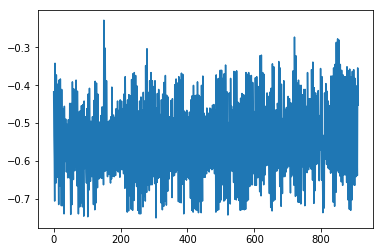

In [35]:
loaded_state = np.load('data_5.npy')

# print the array
plt.plot([row[3] for row in loaded_state])


In [40]:
for i in range(10):
    print(max(loaded_state[:, i]) )

0.17031598091125488
-0.12114405632019043
1.2532360553741455
-0.2286078929901123
0.127363920211792
0.1503739356994629
-0.09821796417236328
1.2640581130981445
-0.3021559715270996
0.12429594993591309


In [41]:
for i in range(10):
    print(min(loaded_state[:, i]) )

-0.09506607055664062
-0.6887240409851074
0.7715599536895752
-0.7501680850982666
-0.17176604270935059
-0.12267804145812988
-0.6029040813446045
0.7777800559997559
-0.797637939453125
-0.17176604270935059
